# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [15]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [4]:
# Eu pensei em modificar a coluna Age de float para int, mas considerando a variável preditora, acredito que a informação decimal será coluna Age será importante para análise de Credit Score.

# Retirada de vírgulas e pontos na coluna Income
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = df['Income'].str.replace('.', '')

df['Income'] = df['Income'].astype(float)

df.dtypes

,0
Age,float64
Gender,object
Income,float64
Education,object
Marital Status,object
Number of Children,int64
Home Ownership,object
Credit Score,object


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [5]:
# Existem dados faltantes da coluna Age
df.isnull().sum() / len(df) * 100

,0
Age,20.731707
Gender,0.000000
Income,0.000000
Education,0.000000
Marital Status,0.000000
Number of Children,0.000000
Home Ownership,0.000000
Credit Score,0.000000


Embora os dados faltantes da categoria Age represente apenas 20% dos dados, eu vou decidir não excluir porque acredito que ela será importante para análise de credit score , como mencionei acima.

In [6]:
# Verificar mais a fundo a distribuição dos dados
df['Age'].describe()

,Age
count,130.000000
mean,37.507692
std,8.500110
min,25.000000
25%,30.000000
50%,36.000000
75%,45.000000
max,53.000000


A média e a mediana são próximas, então há possibilidade de substituição por qualquer uma das duas. Vou plotar alguns gráficos para melhor análise.

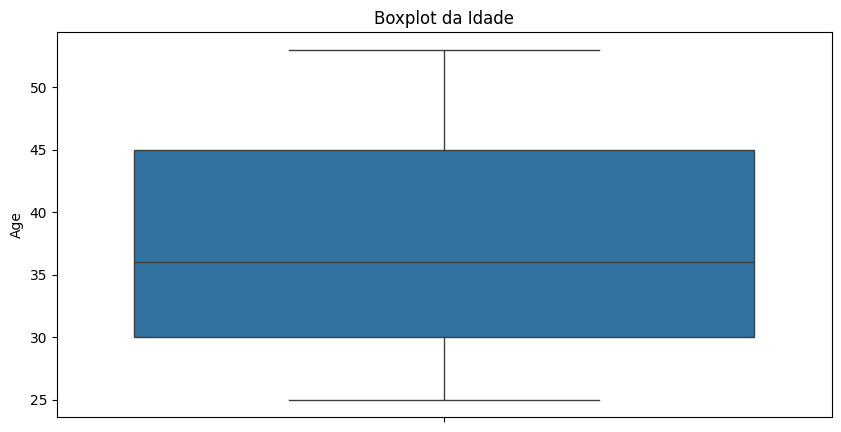

In [7]:

figure = px.histogram(data_frame = df, x = 'Age')
figure.update_layout(width=850, height=600, title_text='Distribuição da Idade')
figure.show()

plt.figure(figsize = (10, 5))
sns.boxplot(df['Age'])
plt.title('Boxplot da Idade')
plt.show()

O boxplot não consta outliers, mas existe uma maior distruição entre pessoas com idade de 35 a 45 anos. E como a média e mediana apresentam valores muito próximos eu vou substituir pela mediana.  

In [8]:
mediana_age = df['Age'].median()
df['Age'].fillna(mediana_age, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ KB


/tmp/ipython-input-2905336891.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [28]:
df['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [29]:
df['Marital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [30]:
df['Home Ownership'].unique()

array(['Rented', 'Owned'], dtype=object)

In [31]:
df['Credit Score'].unique()

array(['High', 'Average', 'Low'], dtype=object)

In [32]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Parece que todas as variavéis categóricas estão bem estruturada, sem necessidade de tratamento.

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [33]:
df.describe()

,Age,Income,Number of Children
count,164.000000,1.640000e+02,164.000000
mean,37.195122,8.376524e+06,0.652439
std,7.586619,3.245731e+06,0.883346
min,25.000000,2.500000e+06,0.000000
25%,31.750000,5.750000e+06,0.000000
50%,36.000000,8.375000e+06,0.000000
75%,43.000000,1.050000e+07,1.000000
max,53.000000,1.625000e+07,3.000000


A variável Income parece apresentar alguns outliers com valores muito acima de 75%. Vamos analisar através do gráficos.

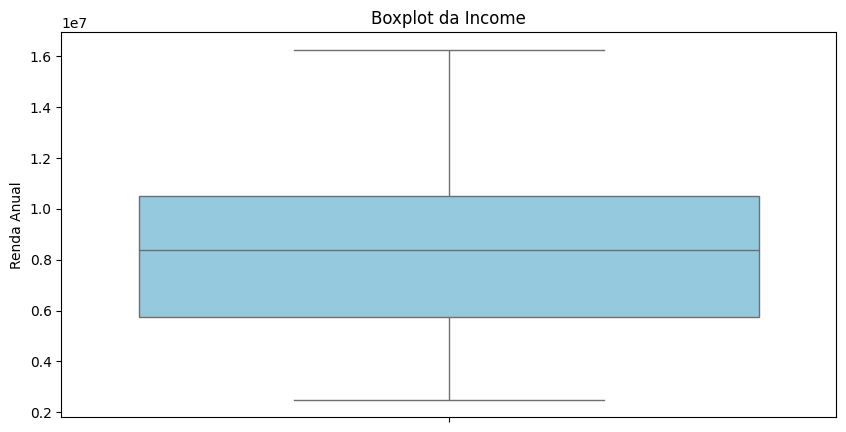

In [11]:
plt.figure(figsize = (10, 5))
sns.boxplot(data= df, y='Income', color='skyblue')
plt.ylabel('Renda Anual')
plt.title('Boxplot da Income')
plt.show()

Estatísticamente o boxplot não apresenta valores considerados outliers. Vamos verificar com IQR.

In [12]:
def detect_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

outliers_income = detect_outliers(df, 'Income')
len(outliers_income)

0

Não há outliers estatísticos em 'Income'. Portanto, não há necessidade de tratamento.

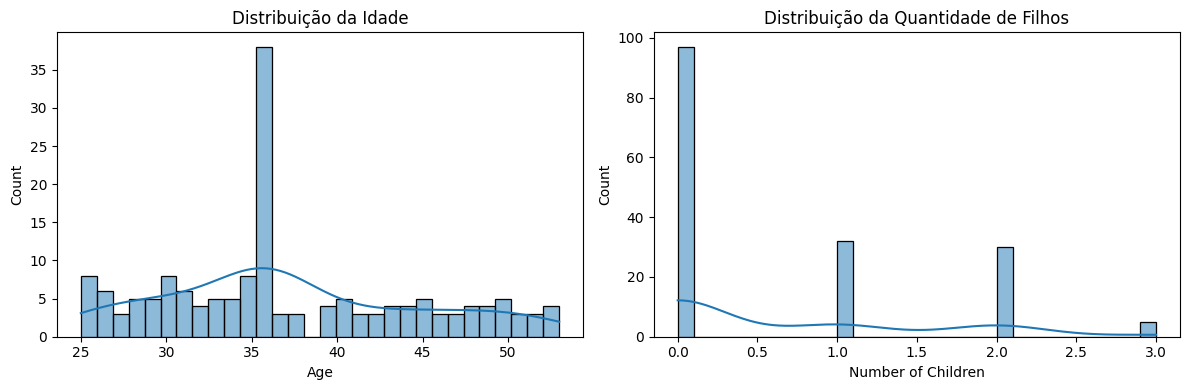

In [18]:
# Gráficos para análise univariada das demais categorias numéricas:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Age'], bins= 30, kde= True, ax=axes[0])
axes[0].set_title('Distribuição da Idade')

sns.histplot(df['Number of Children'], bins= 30, kde= True, ax=axes[1])
axes[1].set_title('Distribuição da Quantidade de Filhos')

plt.tight_layout()
plt.show()


A maioria dos clientes têm idades entre 36 a 38 anos, sugerindo que nossa população é composta por adultos que podem estar em fase inicial de estabilidade financeira, podendo haver melhora no score de crédito a partir dessa idade.

A maior parte dos clientes não possuem filhos, o que pode ser um indicativo de não estabilidade financeira suficiente para estes clientes, afetando diretamente no seu score.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

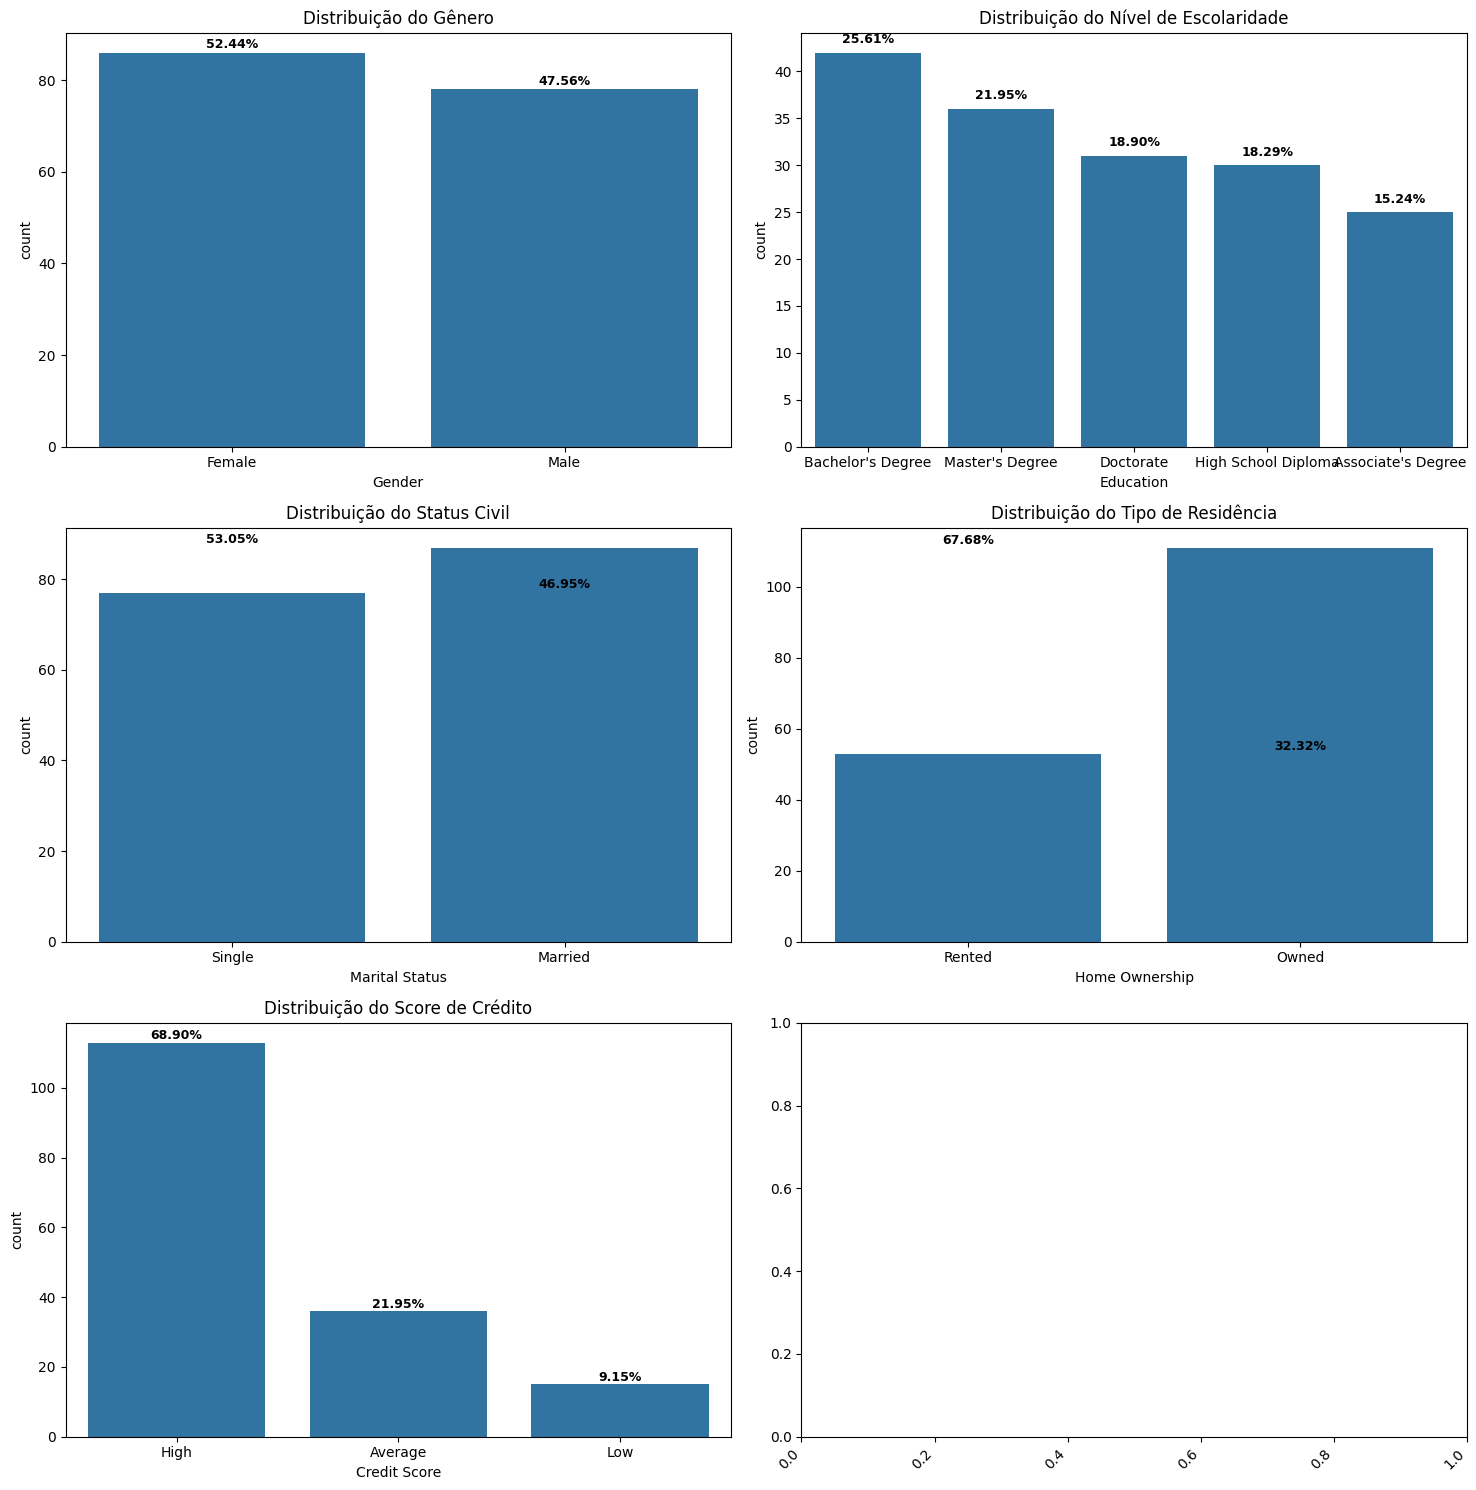

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))

# Distribuição do Gênero
sns.countplot(x='Gender', data=df, ax=axes[0,0])
axes[0,0].set_title('Distribuição do Gênero')
contagem_genero = df['Gender'].value_counts()
porcentagem_genero = (contagem_genero / contagem_genero.sum()) * 100

for i, (cat,v) in enumerate(contagem_genero.items()):
  axes[0,0].text(i, v + 1, f'{porcentagem_genero[cat]:.2f}%',
                  ha='center', fontsize=9, fontweight='bold', color='black')
# Há um balanço entre o gênero dos clientes com uma diferença pequena de 4,88 a mais para Female.

# Distribuição do Nível de Escolaridade
sns.countplot(x='Education', data=df, ax=axes[0,1])
axes[0,1].set_title('Distribuição do Nível de Escolaridade')
plt.xticks(rotation=45, ha='right')
contagem_educacao = df['Education'].value_counts()
porcentagem_educacao = (contagem_educacao / contagem_educacao.sum()) * 100

for i, (cat,v) in enumerate(contagem_educacao.items()):
  axes[0,1].text(i, v + 1, f'{porcentagem_educacao[cat]:.2f}%',
                  ha='center', fontsize=9, fontweight='bold', color='black')
# A maioria dos clientes têm grau de escolaridade avançado, 25% têm bacharelado.

# Distribuição do Status Civil
sns.countplot(x='Marital Status', data=df, ax=axes[1,0])
axes[1,0].set_title('Distribuição do Status Civil')
contagem_marital = df['Marital Status'].value_counts()
porcentagem_marital = (contagem_marital / contagem_marital.sum()) * 100

for i, (cat,v) in enumerate(contagem_marital.items()):
  axes[1,0].text(i, v + 1, f'{porcentagem_marital[cat]:.2f}%',
                  ha='center', fontsize=9, fontweight='bold', color='black')
# A maioria dos clientes são solteiros e há um certo balanceamento entre os clientes solteiros e casados.

# Distribuição do Tipo de Residência
sns.countplot(x='Home Ownership', data=df, ax=axes[1,1])
axes[1,1].set_title('Distribuição do Tipo de Residência')
contagem_home = df['Home Ownership'].value_counts()
porcentagem_home = (contagem_home / contagem_home.sum()) * 100

for i, (cat,v) in enumerate(contagem_home.items()):
  axes[1,1].text(i, v + 1, f'{porcentagem_home[cat]:.2f}%',
                  ha='center', fontsize=9, fontweight='bold', color='black')
# A maioria dos clientes têm casa própria

# Distribuição do Score de Crédito
sns.countplot(x='Credit Score', data=df, ax=axes[2,0])
axes[2,0].set_title('Distribuição do Score de Crédito')
contagem_score = df['Credit Score'].value_counts()
porcentagem_score = (contagem_score / contagem_score.sum()) * 100

for i, (cat,v) in enumerate(contagem_score.items()):
  axes[2,0].text(i, v + 1, f'{porcentagem_score[cat]:.2f}%',
                  ha='center', fontsize=9, fontweight='bold', color='black')
# 68% dos clientes têm score alto, o que pode tem relação direta com estabilidade financeira, o fato de terem grau de escolaridade alto e casa própria.

plt.tight_layout()
plt.show()

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

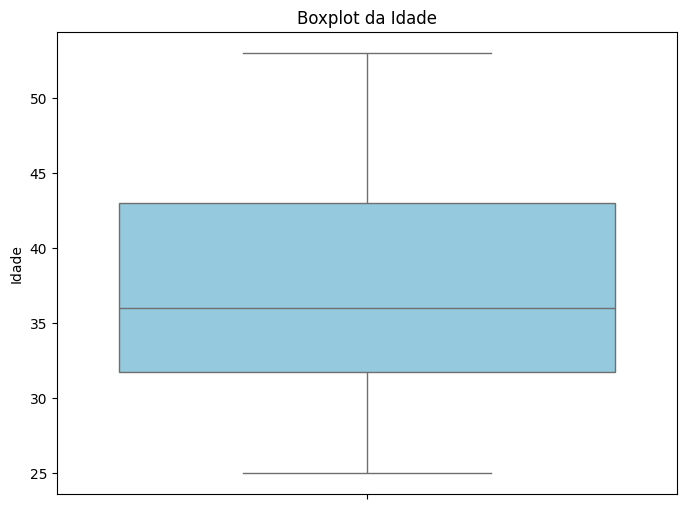

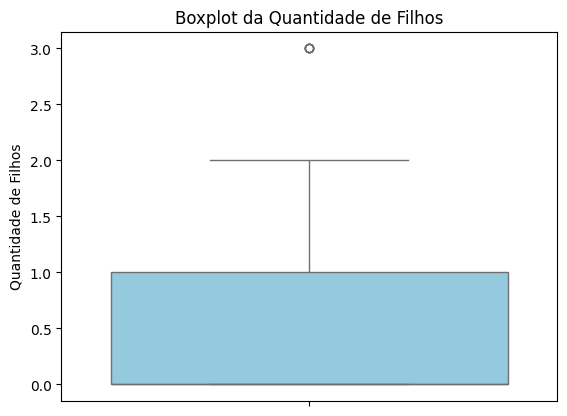

In [25]:
plt.figure(figsize = (8,6))
sns.boxplot(data= df, y='Age', color='skyblue')
plt.ylabel('Idade')
plt.title('Boxplot da Idade')
plt.show()

sns.boxplot(data= df, y='Number of Children', color='skyblue')
plt.ylabel('Quantidade de Filhos')
plt.title('Boxplot da Quantidade de Filhos')
plt.show()

Levando em consideração que o número de filhis dos nossos clientes é de 0 e 3, não podemos considerar 3 como sendo um outlier. Em relação a variável, Idade não há outliers.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [27]:
# Relação Idade e Status Civil
fig = px.histogram(df, x='Age', color='Marital Status', barmode='stack')
fig.update_layout(width=850, height=600, title_text='Relação Idade e Status Civil')
fig.show()

df_grouped = df.groupby(['Age', 'Marital Status']).size().reset_index(name='Count')
total_por_churn = df_grouped.groupby('Age')['Count'].transform('sum')
df_grouped['Percentage'] = (df_grouped['Count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Age', y='Percentage', color='Marital Status', barmode='group')
fig.update_layout(width=850, height=600, title_text='Relação Idade e Status Civil')
fig.show()

Podemos observar que há uma tendência de que possoas mais velhas possuem uma relação conjugal mais estável.

In [29]:
# Relação Score e Escolaridade
fig = px.histogram(df, x='Credit Score', color='Education', barmode='stack')
fig.update_layout(width=850, height=600, title_text='Relação Score e Escolaridade')
fig.show()

df_grouped = df.groupby(['Credit Score', 'Education']).size().reset_index(name='Count')
total_por_churn = df_grouped.groupby('Credit Score')['Count'].transform('sum')
df_grouped['Percentage'] = (df_grouped['Count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Credit Score', y='Percentage', color='Education', barmode='group')
fig.update_layout(width=850, height=600, title_text='Relação Score e Escolaridade')
fig.show()

É possível observar que o grau de escolaridade dos clientes influecia diretamente no score de crédito , sendo mais alto para aqueles com grau de escolaridade mais avançado.

In [5]:
# Relação Salário e Idade
fig = px.histogram(df, x='Income', color='Age', barmode='stack')
fig.update_layout(width=850, height=600, title_text='Relação Salário e Idade')
fig.show()

df_grouped = df.groupby(['Income', 'Age']).size().reset_index(name='Count')
total_por_churn = df_grouped.groupby('Income')['Count'].transform('sum')
df_grouped['Percentage'] = (df_grouped['Count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Income', y='Percentage', color='Age', barmode='group')
fig.update_layout(width=850, height=600, title_text='Relação Salário e Idade')
fig

Aqui observamos que os clientes que têm os salários mais altos são mais velhos. Portanto, a idade dos clientes e o renda anual tem relação direta.

In [6]:
# Relação Salário e Score de Crédito
fig = px.histogram(df, x='Income', color='Credit Score', barmode='stack')
fig.update_layout(width=850, height=600, title_text='Relação Salário e Score de Crédito')
fig.show()

df_grouped = df.groupby(['Income', 'Credit Score']).size().reset_index(name='Count')
df_grouped['Percentage'] = (df_grouped['Count'] / df_grouped.groupby('Income')['Count'].transform('sum')) * 100

fig = px.bar(df_grouped, x='Income', y='Percentage', color='Credit Score', barmode='group')
fig.update_layout(width=850, height=600, title_text='Relação Salário e Score de Crédito')
fig

Aqui nos gráficos fica claro que quanto maior o salário, maior é o score de crédito dos clientes.

In [7]:
# Relação Moradia e Score de Crédito
fig = px.histogram(df, x='Credit Score', color='Home Ownership', barmode='stack')
fig.update_layout(width=850, height=600, title_text='Relação Moradia e Score de Crédito')
fig.show()

df_grouped = df.groupby(['Credit Score', 'Home Ownership']).size().reset_index(name='Count')
df_grouped['Percentage'] = (df_grouped['Count'] / df_grouped.groupby('Credit Score')['Count'].transform('sum')) * 100

fig = px.bar(df_grouped, x='Credit Score', y='Percentage', color='Home Ownership', barmode='group')
fig.update_layout(width=850, height=600, title_text='Relação Moradia e Score de Crédito')
fig

Clientes com casa própria tem score de crédito mais alto, as duas variáveis têm relação direta.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

1 - A quantidade de filhos influencia no score de crédito?

2 - Há diferença no score de crédito entre homens e mulheres?

3 - Pessoas casadas têm o score de crédito mais alto?

In [9]:
#Relação Quantidade de Filhos e Score de Crédito
fig = px.histogram(df, x='Number of Children', color='Credit Score', barmode='stack')
fig.update_layout(width=850, height=600, title_text='Relação Quantidade de Filhos e Score de Crédito')
fig.show()

df_grouped = df.groupby(['Number of Children', 'Credit Score']).size().reset_index(name='Count')
df_grouped['Percentage'] = (df_grouped['Count'] / df_grouped.groupby('Number of Children')['Count'].transform('sum')) * 100

fig = px.bar(df_grouped, x='Number of Children', y='Percentage', color='Credit Score', barmode='group')
fig.update_layout(width=850, height=600, title_text='Relação Quantidade de Filhos e Score de Crédito')
fig.show()

Podemos observar que pessoas com filhos têm maior tendência a score alto, mas em contra partida não significa que pessoas sem filhos não tenha score alto, acredito que as variáveis não têm causalidade.

In [10]:
# Relação Gênero e Score de Crédito
fig = px.histogram(df, x='Credit Score', color='Gender', barmode='stack')
fig.update_layout(width=850, height=600, title_text='Relação Gênero e Score de Crédito')
fig.show()

df_grouped = df.groupby(['Credit Score', 'Gender']).size().reset_index(name='Count')
df_grouped['Percentage'] = (df_grouped['Count'] / df_grouped.groupby('Credit Score')['Count'].transform('sum')) *100

fig = px.bar(df_grouped, x='Credit Score', y='Percentage', color='Gender', barmode='group')
fig.update_layout(width=850, height=600, title_text='Relação Gênero e Score de Crédito')
fig

Podemos observar que clientes homens tendem a ter um score de crédito um pouco mais alto que mulheres , embora a diferença seja pouco mas só há mulheres com score baixo.

In [11]:
# Relação Status Civil e Score de Crédito
fig = px.histogram(df, x='Credit Score', color='Marital Status', barmode='stack')
fig.update_layout(width=850, height=600, title_text='Relação Status Civil e Score de Crédito')
fig.show()

df_grouped = df.groupby(['Credit Score', 'Marital Status']).size().reset_index(name='Count')
df_grouped['Percentage'] = (df_grouped['Count'] / df_grouped.groupby('Credit Score')['Count'].transform('sum')) * 100

fig = px.bar(df_grouped, x='Credit Score', y='Percentage', color='Marital Status', barmode='group')
fig.update_layout(width=850, height=600, title_text='Relação Status Civil e Score de Crédito')


Clientes casados tendem a ter o score mais alto em relação aos clientes solteiros.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

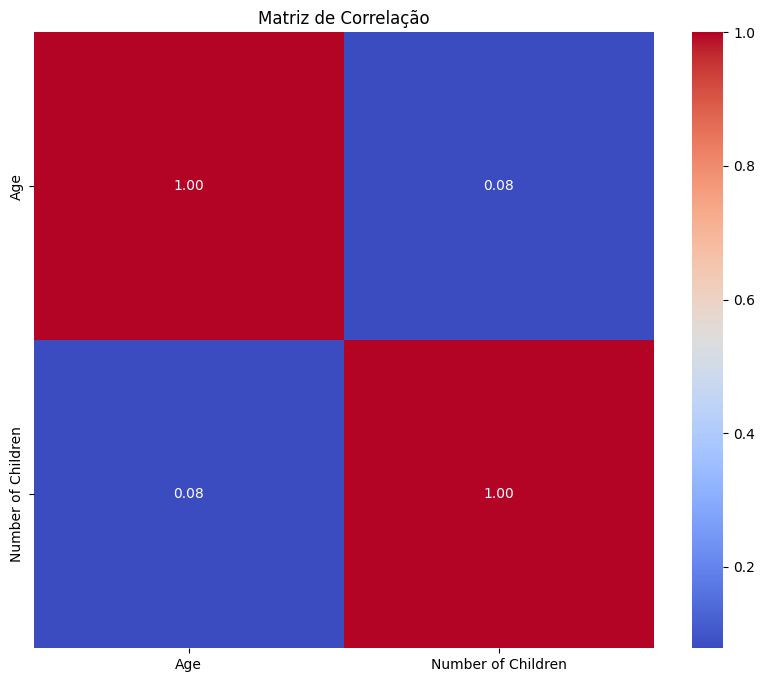

In [16]:
correlation_matrix = df.select_dtypes (include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':10})
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

Não. Idade e número de filhos têm uma correlação baixa.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [17]:
from sklearn.preprocessing import LabelEncoder
lebal_encoder = LabelEncoder()

df['Gender_encoded'] = lebal_encoder.fit_transform(df['Gender'])
df['MaritalStatus_encoded'] = lebal_encoder.fit_transform(df['Marital Status'])
df['HomeOwnership_encoded'] = lebal_encoder.fit_transform(df['Home Ownership'])
df['Credit Score_encoded'] = lebal_encoder.fit_transform(df['Credit Score'])

df = pd.get_dummies(df, columns=['Education'], prefix= 'Education', drop_first=True)
df = df.drop(columns=['Gender', 'Marital Status', 'Home Ownership', 'Credit Score'])
df.head()

,Age,Income,Number of Children,Gender_encoded,MaritalStatus_encoded,HomeOwnership_encoded,Credit Score_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,25.0,"50.000,00",0,0,1,1,1,True,False,False,False
1,30.0,"100.000,00",2,1,0,0,1,False,False,False,True
2,35.0,"75.000,00",1,0,0,0,1,False,True,False,False
3,40.0,"125.000,00",0,1,1,0,1,False,False,True,False
4,45.0,"100.000,00",3,0,0,0,1,True,False,False,False


In [19]:
df.dtypes

,0
Age,float64
Income,object
Number of Children,int64
Gender_encoded,int64
MaritalStatus_encoded,int64
HomeOwnership_encoded,int64
Credit Score_encoded,int64
Education_Bachelor's Degree,bool
Education_Doctorate,bool
Education_High School Diploma,bool


In [21]:
for column in df.columns:
  if df[column].dtypes == 'bool':
    df[column] = df[column].astype(int)
df.dtypes

,0
Age,float64
Income,object
Number of Children,int64
Gender_encoded,int64
MaritalStatus_encoded,int64
HomeOwnership_encoded,int64
Credit Score_encoded,int64
Education_Bachelor's Degree,int64
Education_Doctorate,int64
Education_High School Diploma,int64


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

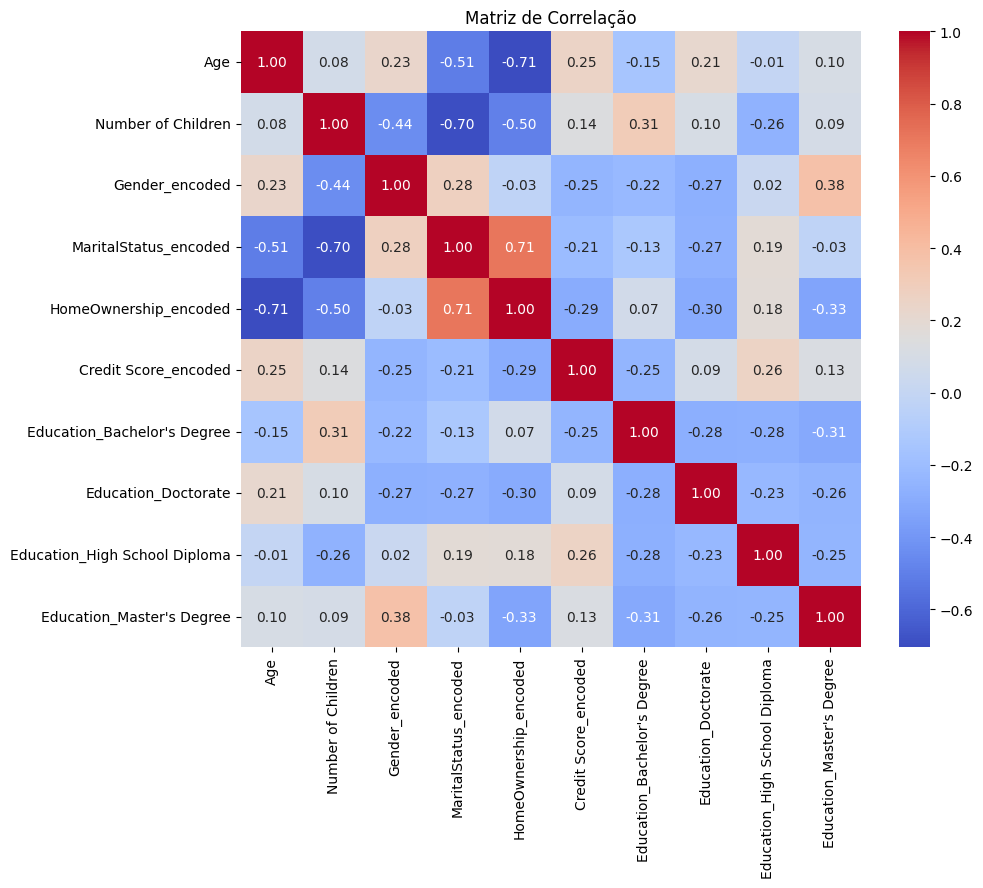

In [22]:
correlation_matrix = df.select_dtypes (include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':10})
plt.title('Matriz de Correlação')
plt.show()

Agora conseguimos observar correlações interessantes e fortes como entre Moradia e Status Civil(clientes casados têm casa própria), e alta correlação negativa entre Idade e Moradia e Status Civil e Número de filhos.   

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [34]:
# Separar os dados em features (x), e alvo (y)
x = df.drop(columns=['Credit Score_encoded'], axis=1)
y = df['Credit Score_encoded']

from sklearn.model_selection import train_test_split

# Separar os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (123, 10)
x_test shape: (41, 10)
y_train shape: (123,)
y_test shape: (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

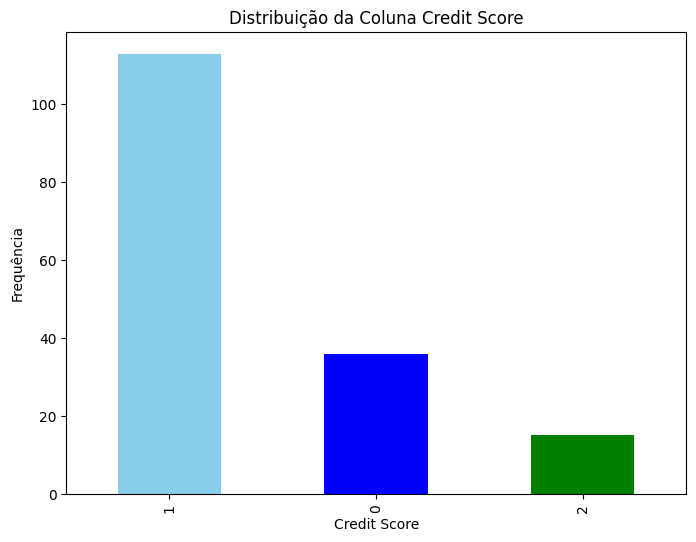

In [29]:
cse_counts = df['Credit Score_encoded'].value_counts()
plt.figure(figsize=(8,6))
cse_counts.plot(kind='bar', color=['skyblue', 'blue', 'green'])
plt.title('Distribuição da Coluna Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequência')
plt.show()


In [27]:
print((df['Credit Score_encoded'].value_counts(normalize=True) * 100))

Credit Score_encoded
1    68.902439
0    21.951220
2     9.146341
Name: proportion, dtype: float64


Observamos que quase 69% dos clientes têm Score de Crédito alto, e faz sentido considerando que a maioria deles têm grau de escolaridade alto , casa própria , que são variáveis que aumentam consideravelmente o score. Em contra partida, se considerarmos variações no score por outras variáveis, esse resultado pode influenciar de forma errada o modelo. Sendo assim, é necessário fazer o balanciamento dos dados.

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

print('Distribuição das classes após o balanceamento:')
print(y_train_balanced.value_counts())
train_balanced = y_train_balanced.value_counts()
print('Balanciamento em ytrain:')
print(train_balanced)

Distribuição das classes após o balanceamento:
Credit Score_encoded
0    84
2    84
1    84
Name: count, dtype: int64
Balanciamento em ytrain:
Credit Score_encoded
0    84
2    84
1    84
Name: count, dtype: int64


In [36]:
y_train_balanced.to_csv('y_train_balanced.csv', index=False)
x_train_balanced.to_csv('x_train_balanced.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
